<a href="https://www.kaggle.com/code/prasadckulkarni/tableau-eda-tabular-playground?scriptVersionId=110613563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1664563673950' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TabularPlaygroundseries-Sep2022&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TabularPlaygroundseries-Sep2022&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ta&#47;TabularPlaygroundseries-Sep2022&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1664563673950');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='300px';vizElement.style.maxWidth='1050px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='987px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='300px';vizElement.style.maxWidth='1050px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='987px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [3]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



In [4]:
df=pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv",index_col='date',parse_dates=True)
df_test=pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv",index_col='date',parse_dates=True)

> **1.Data Exploration**

In [5]:
df.head()

,row_id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,1,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,2,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [6]:
df_test.head()

,row_id,country,store,product
date,,,,
2021-01-01,70128,Belgium,KaggleMart,Kaggle Advanced Techniques
2021-01-01,70129,Belgium,KaggleMart,Kaggle Getting Started
2021-01-01,70130,Belgium,KaggleMart,Kaggle Recipe Book
2021-01-01,70131,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
2021-01-01,70132,Belgium,KaggleRama,Kaggle Advanced Techniques


In [7]:
print(df.shape)
print(df_test.shape)

(70128, 5)
(17520, 4)


In [8]:
#as row_id isnt useful to us so lets drop it
df.drop('row_id',axis=1,inplace=True)


In [9]:
df.head()

,country,store,product,num_sold
date,,,,
2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [10]:
#this shows boolean values for every record
df.isnull()

,country,store,product,num_sold
date,,,,
2017-01-01,False,False,False,False
2017-01-01,False,False,False,False
2017-01-01,False,False,False,False
2017-01-01,False,False,False,False
2017-01-01,False,False,False,False
...,...,...,...,...
2020-12-31,False,False,False,False
2020-12-31,False,False,False,False
2020-12-31,False,False,False,False


In [11]:
#this shows column-wise total null values
df.isnull().sum()

country     0
store       0
product     0
num_sold    0
dtype: int64

In [12]:
#this helps to know whether a column contains null values or not
#since our df doesnt contain any null value so it shows the False
df.isnull().any()

country     False
store       False
product     False
num_sold    False
dtype: bool

In [13]:
#lets understand df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70128 entries, 2017-01-01 to 2020-12-31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   70128 non-null  object
 1   store     70128 non-null  object
 2   product   70128 non-null  object
 3   num_sold  70128 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [14]:
#let's see the range of dates---start date , end date, total number of days
print("start_date is:" ,df.index[0])
print("End_date is:" ,df.index[-1])
print("Total number of days:",(df.index[-1]-df.index[0]).days)
#Total number of days is 1461 since it starts from index[0]

start_date is: 2017-01-01 00:00:00
End_date is: 2020-12-31 00:00:00
Total number of days: 1460


In [15]:
#i like this approach of analyzing each column separately and 1 by 1
#let's go for country
df['country'].unique()
#this gives list of unique countries

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [16]:
df['country'].nunique()

6

In [17]:
df.columns

Index(['country', 'store', 'product', 'num_sold'], dtype='object')

In [18]:
#we want to find number of these countries
print("The Number of unique countries is :", df['country'].nunique())
print("The Number of unique Stores is :", df['store'].nunique())
print("The Number of unique products is :", df['product'].nunique())

The Number of unique countries is : 6
The Number of unique Stores is : 2
The Number of unique products is : 4


# 2**.Data Visualization**

In [19]:
df.resample("A").sum().iplot(title="Total sells in each year from 2018 - 2020", xTitle='Years', yTitle='Sell')

In [20]:
#sales by country, product and year
df.groupby('country')['num_sold'].sum()

country
Belgium    2781050
France     2512319
Germany    2786415
Italy      2201092
Poland     1341545
Spain      2003238
Name: num_sold, dtype: int64

In [21]:
df.groupby('product')['num_sold'].sum()

product
Kaggle Advanced Techniques          3913910
Kaggle Getting Started              3136903
Kaggle Recipe Book                  2349817
Kaggle for Kids: One Smart Goose    4225029
Name: num_sold, dtype: int64

In [22]:
df.groupby('store')['num_sold'].sum()

store
KaggleMart    10117254
KaggleRama     3508405
Name: num_sold, dtype: int64

In [23]:
#lets draw a bar graph for this
#plotly.express.bar
px.bar(df.groupby('country')['num_sold'].sum(), orientation='h',title='coutry-wise sells')

In [24]:
#gradual development...applying log to x axis
px.bar(df.groupby('country')['num_sold'].sum(), orientation='h',title='coutry-wise sells',log_x=True)

In [25]:
px.bar(df.groupby('store')['num_sold'].sum(), orientation='h',title='store-wise sells')

In [26]:
px.bar(df.groupby('product')['num_sold'].sum(), orientation='h',title='Product-wise sells')

<BarContainer object of 12 artists>

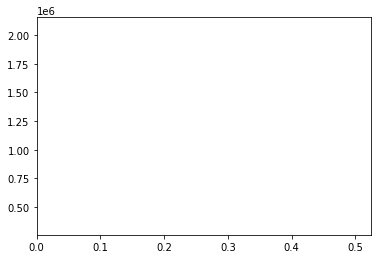

In [27]:
plt.barh(df.groupby(['country','store'])['num_sold'].sum(),width=0.5)
#no use

In [28]:
#px.bar(df.groupby(['country','store'])['num_sold'].sum(),orientation='h',title='country-wise stores sales analysis')
#pandas multi-inddex isnt supported by plotly 

In [29]:
#lets go for unstack...using it for the first time
px.bar(df.groupby(['country','store'])['num_sold'].sum().unstack(0),orientation='h',title='country-wise stores sales analysis')
#unstack 0 means unstack country
#simple way to understand this unstacking---unstack(0) means unstack country and keep store as labels

In [30]:
px.bar(df.groupby(['country','store'])['num_sold'].sum().unstack(1),orientation='h',title='country-wise stores sales analysis')
#unstack 1 means unstack store
#unstack(1) means keep country fixed as a label and unstack store....


In [31]:
#px.bar(df.groupby(['country','store','product'])['num_sold'].sum().unstack(2),orientation='h',title='country-wise stores and products sales analysis')
#this doesnt work directly
#TypeError: Data frame index is a pandas MultiIndex. pandas MultiIndex is not supported by plotly express at the moment.

In [32]:
dfg = df.groupby(['country','store','product']).sum()
dfg
#it looks like this so we need to reset_index()

num_sold
country store      product                                   
Belgium KaggleMart Kaggle Advanced Techniques          593014
                   Kaggle Getting Started              475774
                   Kaggle Recipe Book                  356371
                   Kaggle for Kids: One Smart Goose    638919
        KaggleRama Kaggle Advanced Techniques          205826
                   Kaggle Getting Started              165153
                   Kaggle Recipe Book                  123803
                   Kaggle for Kids: One Smart Goose    222190
France  KaggleMart Kaggle Advanced Techniques          536155
                   Kaggle Getting Started              429665
                   Kaggle Recipe Book                  321652
                   Kaggle for Kids: One Smart Goose    578045
        KaggleRama Kaggle Advanced Techniques          186116
                   Kaggle Getting Started              148831
                   Kaggle Recipe Book                  111312
                   Kaggle for Kids: One Smart Goose    200543
Germany KaggleMart Kaggle Advanced Techniques          593793
                   Kaggle Getting Started              475851
                   Kaggle Recipe Book                  357264
                   Kaggle for Kids: One Smart Goose    641419
        KaggleRama Kaggle Advanced Techniques          206650
                   Kaggle Getting Started              165485
                   Kaggle Recipe Book                  123788
                   Kaggle for Kids: One Smart Goose    222165
Italy   KaggleMart Kaggle Advanced Techniques          470350
                   Kaggle Getting Started              376232
                   Kaggle Recipe Book                  281614
                   Kaggle for Kids: One Smart Goose    506848
        KaggleRama Kaggle Advanced Techniques          162675
                   Kaggle Getting Started              130409
                   Kaggle Recipe Book                   97607
                   Kaggle for Kids: One Smart Goose    175357
Poland  KaggleMart Kaggle Advanced Techniques          285576
                   Kaggle Getting Started              228831
                   Kaggle Recipe Book                  171379
                   Kaggle for Kids: One Smart Goose    310811
        KaggleRama Kaggle Advanced Techniques           98726
                   Kaggle Getting Started               79342
                   Kaggle Recipe Book                   59258
                   Kaggle for Kids: One Smart Goose    107622
Spain   KaggleMart Kaggle Advanced Techniques          426981
                   Kaggle Getting Started              342798
                   Kaggle Recipe Book                  257082
                   Kaggle for Kids: One Smart Goose    460830
        KaggleRama Kaggle Advanced Techniques          148048
                   Kaggle Getting Started              118532
                   Kaggle Recipe Book                   88687
                   Kaggle for Kids: One Smart Goose    160280

In [33]:
dfg = df.groupby(['country','store','product']).sum().reset_index()
dfg

,country,store,product,num_sold
0,Belgium,KaggleMart,Kaggle Advanced Techniques,593014
1,Belgium,KaggleMart,Kaggle Getting Started,475774
2,Belgium,KaggleMart,Kaggle Recipe Book,356371
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,638919
4,Belgium,KaggleRama,Kaggle Advanced Techniques,205826
5,Belgium,KaggleRama,Kaggle Getting Started,165153
6,Belgium,KaggleRama,Kaggle Recipe Book,123803
7,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,222190
8,France,KaggleMart,Kaggle Advanced Techniques,536155
9,France,KaggleMart,Kaggle Getting Started,429665


In [34]:
px.bar(dfg,x='num_sold',y='country',orientation='h')
#hover_data just added the store to tooltip.


In [35]:
px.bar(dfg,hover_data=['store'],x='num_sold',y='country',orientation='h')
#now i will gradually add more parameter to understand the difference
#using intuition: every country is loooking same , will be good to colour them differently...lets colour

In [36]:
px.bar(dfg,hover_data=['store'],x='num_sold',y='country',orientation='h',color='country')
#looking good but am unable to decide between Kagglemart and KaggleRama


In [37]:
df.head()

,country,store,product,num_sold
date,,,,
2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [38]:
df.tail()

,country,store,product,num_sold
date,,,,
2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135
2020-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,202


<AxesSubplot:xlabel='product', ylabel='num_sold'>

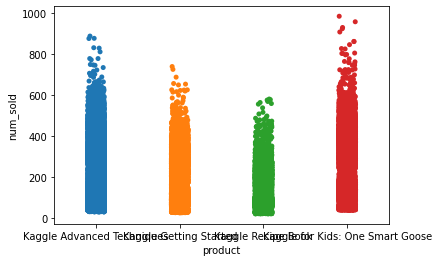

In [39]:
import seaborn as sns
figsize=(12,8)
sns.stripplot(data=df, x='product',y='num_sold')